In [30]:
import tensorflow as tf

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

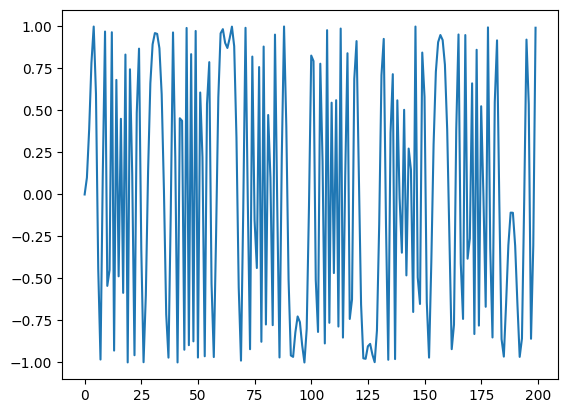

In [32]:
series = np.sin(0.1*np.arange(200)**2)
plt.plot(series)
plt.show()

In [33]:
T = 10
D = 1
X =[]
Y = []

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X

[array([ 0.        ,  0.09983342,  0.38941834,  0.78332691,  0.9995736 ,
         0.59847214, -0.44252044, -0.98245261,  0.1165492 ,  0.96988981]),
 array([ 0.09983342,  0.38941834,  0.78332691,  0.9995736 ,  0.59847214,
        -0.44252044, -0.98245261,  0.1165492 ,  0.96988981, -0.54402111]),
 array([ 0.38941834,  0.78332691,  0.9995736 ,  0.59847214, -0.44252044,
        -0.98245261,  0.1165492 ,  0.96988981, -0.54402111, -0.44964746]),
 array([ 0.78332691,  0.9995736 ,  0.59847214, -0.44252044, -0.98245261,
         0.1165492 ,  0.96988981, -0.54402111, -0.44964746,  0.96565778]),
 array([ 0.9995736 ,  0.59847214, -0.44252044, -0.98245261,  0.1165492 ,
         0.96988981, -0.54402111, -0.44964746,  0.96565778, -0.92912401]),
 array([ 0.59847214, -0.44252044, -0.98245261,  0.1165492 ,  0.96988981,
        -0.54402111, -0.44964746,  0.96565778, -0.92912401,  0.68196362]),
 array([-0.44252044, -0.98245261,  0.1165492 ,  0.96988981, -0.54402111,
        -0.44964746,  0.96565778, -0.92

In [34]:

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
X

array([[[ 0.        ],
        [ 0.09983342],
        [ 0.38941834],
        ...,
        [-0.98245261],
        [ 0.1165492 ],
        [ 0.96988981]],

       [[ 0.09983342],
        [ 0.38941834],
        [ 0.78332691],
        ...,
        [ 0.1165492 ],
        [ 0.96988981],
        [-0.54402111]],

       [[ 0.38941834],
        [ 0.78332691],
        [ 0.9995736 ],
        ...,
        [ 0.96988981],
        [-0.54402111],
        [-0.44964746]],

       ...,

       [[-0.30255919],
        [-0.10805334],
        [-0.10893625],
        ...,
        [-0.02799534],
        [ 0.92187396],
        [ 0.5377915 ]],

       [[-0.10805334],
        [-0.10893625],
        [-0.30509771],
        ...,
        [ 0.92187396],
        [ 0.5377915 ],
        [-0.85887688]],

       [[-0.10893625],
        [-0.30509771],
        [-0.65253815],
        ...,
        [ 0.5377915 ],
        [-0.85887688],
        [-0.30280235]]])

In [35]:
i = tf.keras.layers.Input(shape=(T,1))
x = tf.keras.layers.LSTM(5)(i)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.models.Model(i, x)
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - loss: 0.6222 - val_loss: 0.5065
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5798 - val_loss: 0.4946
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6099 - val_loss: 0.5080
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5508 - val_loss: 0.4995
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5685 - val_loss: 0.4882
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5522 - val_loss: 0.4858
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5450 - val_loss: 0.4882
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5563 - val_loss: 0.4942
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5593 - val_loss: 0.5066
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5393 - val_loss: 0.4923
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5758 - val_loss: 0.4816
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5692 - val_loss: 0.4756


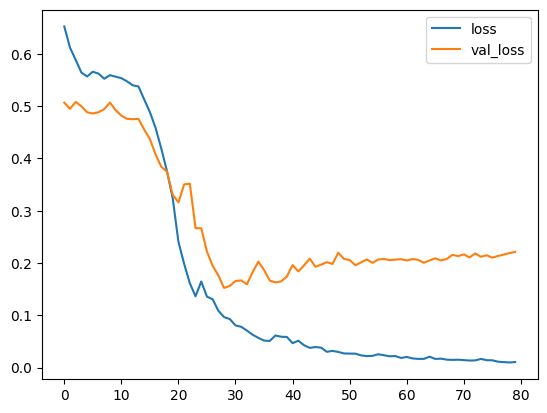

In [36]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [37]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0]

  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

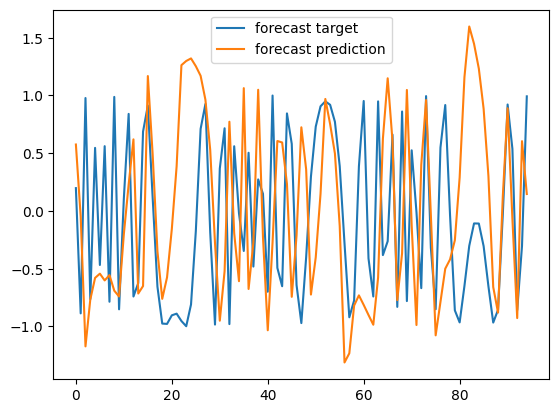

In [38]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()